In [2]:
import numpy as np
import pandas as pd
from subprocess import check_output


syd=pd.read_csv('sym_dis_matrix.csv')
dia=pd.read_csv('dia_3.csv')
sym=pd.read_csv('sym_3.csv')

In [3]:
A=syd
A=A.append(A)
B=A.drop(['eye'],axis=1)
C=B

In [4]:
C.index.name='eye'
C_df=pd.DataFrame(C)
dia.reset_index(level=0, inplace=True)
print(len(dia)-1, 'nr of disease')
print(len(sym)-1, 'nr of symptoms')

109 nr of disease
130 nr of symptoms


In [5]:
from scipy.cluster.vq import whiten
C=whiten(C_df)

In [6]:
from numpy.linalg import inv
U,s,V=np.linalg.svd(C,full_matrices=False)

In [11]:
S=np.diag(s)
reductie=30
S=S[0:reductie,0:reductie]
iS=inv(S)
US=np.dot(U[:,0:reductie],iS)
print(s[:reductie].sum(), 'explained variability of total ',s.sum(),s[:reductie].sum()/s.sum()*100," % variation explained")
US_df=pd.DataFrame(data=US)
print(A.shape)
print(U.shape)
print(V.shape)
print(US.shape)



791.2358192374506 explained variability of total  1108.8275328367754 71.35787990519931  % variation explained
(262, 110)
(262, 109)
(109, 109)
(262, 30)


In [12]:
import matplotlib.pylab as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(U, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(S, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

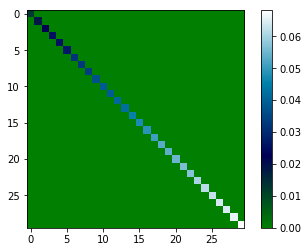

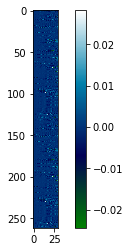

In [13]:

import matplotlib.pylab as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(iS, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(US_df, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [14]:
Qsym=(sym.loc[(sym['symptom']=='Lower abdominal pain')| (sym['symptom'] == 'Shortness of breath')| (sym['symptom'] == 'Throat pain') ])
Qsym.index.name='eye'
print(Qsym)
print(Qsym.iloc[0,:].name)
Qsym2=pd.DataFrame({'eye': []})
for xx in range (len(Qsym)):
    waa=Qsym.iloc[xx,:].name
    print(float(waa-1))
    # looking up Symptom 24,30 in US_df
    Qsy=pd.DataFrame((pd.DataFrame(US_df.loc[waa-1,:reductie-1]).T))
    Qsym2=Qsym2.append(Qsy)
del Qsym2['eye']
Qtemp=Qsym2.sum()*2
dise=(dia[dia['_id']==0])
similQd=np.dot(Qtemp,V[0:reductie,:])/np.dot(np.abs(Qtemp),np.abs(V[0:reductie,:]))*100
for xyz in range (len(V)):
    if similQd[xyz]>20:
        disname=dia.iloc[[xyz-1]]
        disname.ix[:,'index'] =similQd[xyz]
        dise=dise.append(disname)
print(dise.sort_values(('index'),ascending=0))

     _id               symptom
eye                           
1      2  Lower abdominal pain
49    88   Shortness of breath
65   120           Throat pain
1
0.0
48.0
64.0


/home/nachiket/.local/lib/python3.5/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)
/home/nachiket/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/nachiket/.local/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


         index   _id                                           diagnose
98   84.028161  1363  Takayasu's arteritisGiant cell arteritis of t...
85   79.807410  1249                  Scleritisinflammation of the eye
100  72.356612  1367                 Tear duct infectionDacryocystitis
24   71.962263   330                                        Head trauma
86   71.163683  1255                      Focal seizurepartial seizure
33   70.921266   469                          Migrainetype of headache
13   58.262531   163      Cholecystitisinflammation of the gallbladder
58   53.250574   829               WarfarinCoumadin, Jantoven overdose
88   51.996028  1283             Farsightednesshyperopia/hypermetropia
62   50.440191   870                 Hydrocephalusbrain fluid build-up
90   48.243819  1299         Graves eye diseaseGraves ophthalmopathy
12   33.283258   162         Cholangitisinflammation of the bile ducts
7    26.542983    98                        Blepharitiseyelid s

In [15]:
syme=dia[dia['_id']==0]
similQs=np.dot(Qtemp,US.T)/np.dot(np.abs(Qtemp),np.abs(US.T))*100
for xyz in range (len(V)):
    if similQs[xyz]>20:
        symname=sym.iloc[[xyz-1]]
        symname.ix[:,'index']=similQs[xyz]
        syme=syme.append(symname)
print(syme.sort_values(('index'),ascending=0))

/home/nachiket/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/nachiket/.local/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nachiket/.local/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

     _id diagnose      index                          symptom
47    81      NaN  89.351449                             Rash
63   114      NaN  81.985254                 General weakness
65   120      NaN  80.984003                      Throat pain
130  295      NaN  69.981323                 Nipple discharge
41    68      NaN  69.653394                    Neck swelling
83   164      NaN  67.761801                  Loss of balance
33    54      NaN  67.761801         Kidney pain (Flank pain)
62   113      NaN  67.761801                         Vomiting
31    51      NaN  44.661840      Insomnia (Trouble sleeping)
82   163      NaN  44.296482                    Bleeding gums
21    29      NaN  43.820405                            Fever
66   121      NaN  42.803901                          Tremors
22    30      NaN  36.556365  Fever in the returning traveler
101  203      NaN  32.730841                     Swollen gums
4      6      NaN  26.258069                 Arm ache or pain
18    26